In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Import file #

In [3]:
rates = pd.read_excel('../../Datasets/01_raw_data_files/baserate.xls', sheet_name='HISTORICAL SINCE 1694')


# Data Cleaning #

In [7]:
rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 8 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Unnamed: 0                                                  177 non-null    object 
 1   Unnamed: 1                                                  837 non-null    object 
 2   Unnamed: 2                                                  854 non-null    object 
 3   Unnamed: 3                                                  849 non-null    object 
 4   Unnamed: 4                                                  0 non-null      float64
 5   Unnamed: 5                                                  1 non-null      object 
 6   Unnamed: 6                                                  0 non-null      float64
 7   CHANGES IN BANK RATE, MINIMUM LENDING RATE, MINIMUM BAND 1  1 non-null      object 
dtyp

In [8]:
# Unnamed: 1 actually shows days, so we rename it to make it more accurate
rates.rename(columns = {'Unnamed: 1':'Day'}, inplace = True)

In [9]:
# What's in this db?
rates.info()
# because I can see the last 4 columns are basically empty, I will drop them later. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 8 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Unnamed: 0                                                  177 non-null    object 
 1   Day                                                         837 non-null    object 
 2   Unnamed: 2                                                  854 non-null    object 
 3   Unnamed: 3                                                  849 non-null    object 
 4   Unnamed: 4                                                  0 non-null      float64
 5   Unnamed: 5                                                  1 non-null      object 
 6   Unnamed: 6                                                  0 non-null      float64
 7   CHANGES IN BANK RATE, MINIMUM LENDING RATE, MINIMUM BAND 1  1 non-null      object 
dtyp

In [10]:
# show me a random 20 to see if the column name has been changed and what other columns I need to modify.
rates.sample(n=20)

,Unnamed: 0,Day,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,"CHANGES IN BANK RATE, MINIMUM LENDING RATE, MINIMUM BAND 1"
861,NaN,10,Aug,9.5625,NaN,NaN,NaN,NaN
709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135,NaN,29,Aug,4,NaN,NaN,NaN,NaN
648,1952,11,Mar,4,NaN,NaN,NaN,NaN
600,1923,5,Jul,4,NaN,NaN,NaN,NaN
886,1986,15,Jan,12.375,NaN,NaN,NaN,NaN
491,NaN,14,Jun,3,NaN,NaN,NaN,NaN
801,1980,3,Jul,16,NaN,NaN,NaN,NaN
25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
452,NaN,3,Aug,3,NaN,NaN,NaN,NaN


In [11]:
# Drop unnamed tables 4,5,6 and changes in bank rate as they are completely blank. 
rates.drop(['Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'CHANGES IN BANK RATE, MINIMUM LENDING RATE, MINIMUM BAND 1'], axis = 1, inplace = True)

In [12]:
# Rename the rest of unnamed columns so they are reflective of their values
rates.rename(columns = {'Unnamed: 0':'Year', 'Unnamed: 2':'Month', 'Unnamed: 3': 'Rates'}, inplace = True)

In [13]:
# Show me the changes
rates.head(15)
# we can see here that the first 6 rows do not contain any data, so we need to drop them. 

,Year,Day,Month,Rates
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,Date,NaN,NaN,New
3,effective,NaN,NaN,rate
4,NaN,NaN,NaN,%
5,Bank Rate,NaN,NaN,NaN
6,1694,NaN,Oct,6
7,NaN,NaN,NaN,NaN
8,1695,NaN,Jan,4.5
9,NaN,NaN,May,3


In [14]:
rates = rates.drop([0,1,2,3,4,5])

In [15]:
# We make sure they have been taken out, which they have. Now, we notice we will need to reset their indeces. 
rates.head(15)

,Year,Day,Month,Rates
6,1694,NaN,Oct,6
7,NaN,NaN,NaN,NaN
8,1695,NaN,Jan,4.5
9,NaN,NaN,May,3
10,NaN,NaN,NaN,NaN
11,1699,NaN,June,4.5
12,NaN,NaN,NaN,NaN
13,1716,NaN,July,4
14,NaN,NaN,NaN,NaN
15,1719,NaN,Apr,5


In [16]:
# reset index for the whole dataframe. 
rates.reset_index()

,index,Year,Day,Month,Rates
0,6,1694,NaN,Oct,6
1,7,NaN,NaN,NaN,NaN
2,8,1695,NaN,Jan,4.5
3,9,NaN,NaN,May,3
4,10,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1026,1032,NaN,NaN,NaN,NaN
1027,1033,2023,2,Feb,4
1028,1034,NaN,23,Mar,4.25
1029,1035,NaN,11,May,4.5


In [17]:
rates.tail(16)

,Year,Day,Month,Rates
1021,NaN,NaN,NaN,NaN
1022,2021,16,Dec,0.25
1023,NaN,NaN,NaN,NaN
1024,2022,3,Feb,0.5
1025,NaN,17,Mar,0.75
1026,NaN,5,May,1
1027,NaN,16,Jun,1.25
1028,NaN,4,Aug,1.75
1029,NaN,22,Sep,2.25
1030,NaN,3,Nov,3


In [18]:
rates.dtypes
# we see that the year column is not an integer, neither are the day and rates (which should be a float).

Year     object
Day      object
Month    object
Rates    object
dtype: object

In [19]:

# Now we need to delete null values.
# To avoid deleting data that will be valuable, and after analysing the dataframe and see what is missing, we are going to ask Pandas to fill in the NaNS with the previous year up to a maximum of 12 (as the number of months in a year)
rates["Year"].fillna(method="bfill", limit=12, inplace=True)

In [20]:
# here we can see they have all filled with the previous year. We noticed there are more NaN values on the days, month and even rates columns. Since we only want rows with rates, we can drop the ones that do not have this info.

rates.sample(n=25)

,Year,Day,Month,Rates
308,1876,30,Dec,4
230,1871,29,Sep,2.5
54,1849,15,June,3.5
240,1872,30,Nov,3.5
39,1846,6,Nov,3.5
609,1926,no,changes,NaN
97,1858,19,Oct,8
972,2001,10,Feb,6
802,1981,25,Nov,14
986,2004,5,Feb,4


In [21]:
rates = rates.dropna(subset=["Rates"])

In [22]:
rates.sample(n=25)

,Year,Day,Month,Rates
560,1912,8,Feb,3.5
626,1931,14,May,2.5
185,1866,2,Oct,5
793,1979,9,Nov,12.5
113,1860,14,July,2.5
984,2004,6,Nov,3.75
312,1877,23,Mar,3.5
300,1876,18,Feb,3.5
117,1861,29,Mar,4.5
338,1880,10,Apr,2


In [23]:
# We need to check if there are anymore NaNs and where they are. 
# We need to check why there are still NaNs values in the year column.  
rates.isna().sum()

Year     62
Day      17
Month     0
Rates     0
dtype: int64

In [24]:
rows_with_nans = rates[rates["Year"].isna()]
rows_with_nans
# we can see that they have not been filled with the previous year because we put a limit of 12 assuming the rates were only changing once a month, but we can see here some months had more than one change. 

,Year,Day,Month,Rates
159,NaN,11,Feb,7
160,NaN,25,Feb,6
161,NaN,16,Apr,7
175,NaN,26,Jan,5
176,NaN,2,Mar,4.5
...,...,...,...,...
841,NaN,24,Aug,11.125
865,NaN,14,Mar,8.5625
1034,NaN,23,Mar,4.25
1035,NaN,11,May,4.5


In [25]:
# so we try the same method as before but changing the limit
rates["Year"].fillna(method="bfill", limit=20, inplace=True)

In [26]:
# There are still a few rows, as 20 is a significantly big number for a limit we dont want to keep increasing it. 7 rows is statistacally not significant, so we will drop these rows. 
rates.isna().sum()

Year      7
Day      17
Month     0
Rates     0
dtype: int64

In [27]:
rates = rates.dropna(subset=["Year"])

In [28]:
# We check again to make sure they have been dropped, and move on to analysing why there are 17 null values in the Day column. 
rates.isna().sum()

Year      0
Day      17
Month     0
Rates     0
dtype: int64

In [29]:
rows_with_nans_day = rates[rates["Day"].isna()]
rows_with_nans_day
# the missing values here are not very significant as we are assuming they only changed the rates once a month and as long as we have the month and rates, it will not make a difference. However, to make it cleaner we can fill them in with the median number of the Day column. 

,Year,Day,Month,Rates
6,1694,NaN,Oct,6
8,1695,NaN,Jan,4.5
9,1699,NaN,May,3
11,1699,NaN,June,4.5
13,1716,NaN,July,4
15,1719,NaN,Apr,5
17,1822,NaN,June,4
19,1825,NaN,Dec,5
21,1827,NaN,July,4
23,1836,NaN,July,4.5


In [30]:
day_median = rates.Day.median()
day_median

14.0

In [31]:
# Now we replace them with 14
rates["Day"].fillna(day_median, inplace=True)

In [32]:
# we can see they have all been filled now. 
rates.Day.isna().sum()

0

In [33]:
rates.sample(n=20)

,Year,Day,Month,Rates
487,1900,11,Jan,5
879,1986,28,Jan,13.875
471,1898,14,Oct,3
724,1974,14,May,8
849,1983,12,Oct,9.625
397,1888,12,Jan,3.5
234,1872,15,Jun,2.25
591,1922,23,Jun,6
349,1882,6,Oct,5
833,1983,26,Jul,11.9375


In [34]:
# one row has a range of dates instead of a single date, because is out of the range we are interested in analysing (1940-1950), we drop it. 
rates["Year"] = rates["Year"].astype("str")
range_rows = rates[rates["Year"].str.contains("-")]
# Drop the range rows
rates = rates.drop(range_rows.index)

In [35]:
# Remove the value 'Repo Rate' from the Year column
rates = rates.loc[rates["Year"] != "Repo Rate"]

In [36]:
# Convert the Year column to an integer dtype
rates["Year"] = rates["Year"].astype("int")

In [37]:
# Convert the column Day to int
rates["Day"] = rates["Day"].astype("int")

In [38]:
# Convert the rates column to a float 
rates["Rates"] = rates["Rates"].astype("float")

In [39]:
rates.dtypes

Year       int64
Day        int64
Month     object
Rates    float64
dtype: object

In [40]:
rates = rates.reset_index(drop=True)

In [41]:
rates.head()

,Year,Day,Month,Rates
0,1694,14,Oct,6.0
1,1695,14,Jan,4.5
2,1699,14,May,3.0
3,1699,14,June,4.5
4,1716,14,July,4.0


In [42]:
rates.tail(15)

,Year,Day,Month,Rates
814,2016,4,Aug,0.25
815,2017,2,Nov,0.50
816,2018,2,Aug,0.75
817,2020,11,Mar,0.25
818,2021,19,Mar,0.10
819,2021,16,Dec,0.25
820,2022,3,Feb,0.50
821,2023,17,Mar,0.75
822,2023,5,May,1.00
823,2023,16,Jun,1.25


In [43]:
# we notice that the rates for 2022 have wrongly been assigned to 2023. We need to change this. 
# Get the indices of the rows we want to change
indices = list(range(820, 828))

In [44]:
# Create a new DataFrame with the updated years
new_rates = rates.copy()
new_rates.loc[indices, "Year"] = 2022

In [45]:
# Update the original DataFrame with the new DataFrame
rates.update(new_rates)

In [46]:
rates.tail(15)
# we can now check that it has been ammended. 

,Year,Day,Month,Rates
814,2016,4,Aug,0.25
815,2017,2,Nov,0.50
816,2018,2,Aug,0.75
817,2020,11,Mar,0.25
818,2021,19,Mar,0.10
819,2021,16,Dec,0.25
820,2022,3,Feb,0.50
821,2022,17,Mar,0.75
822,2022,5,May,1.00
823,2022,16,Jun,1.25


In [47]:
# We also want to add manually the recent changes in base rates so the dataframe is up to date. 

In [48]:
rates.loc[829] = [2023, 23, 'Mar', 4.25] 

In [49]:
rates.loc[830] = [2023, 11, 'May', 4.50] 

In [50]:
rates.loc[831] = [2023, 22, 'Jun', 5.00] 

In [51]:
rates.loc[832] = [2023, 3, 'Aug', 5.25] 

In [52]:
# now that the db looks like we want it to, we can export it to csv 
rates.to_csv('interest_rates_clean_all_years.csv')

# Descriptive Analysis #

<Axes: xlabel='Rates'>

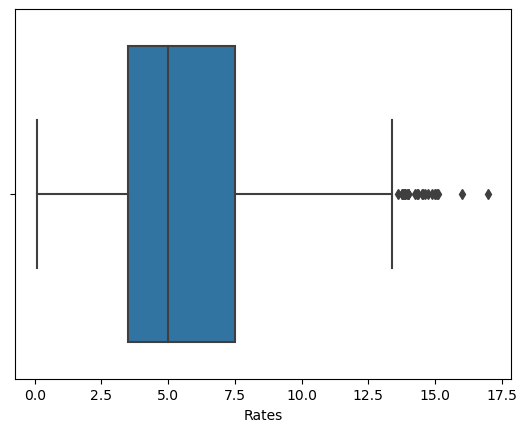

In [56]:
# Checking for outliers
sns.boxplot(x = rates['Rates'])

In [57]:

outliers = np.where(rates['Rates']>13)

In [58]:
# Create a new DataFrame with the outliers, in case we wanto analyse them later
outliers_rates = rates.iloc[outliers]

In [59]:
outliers

(array([611, 612, 613, 614, 615, 616, 640, 643, 644, 645, 646, 649, 650,
        651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 662, 711, 712,
        743, 744, 745, 746, 747, 748, 749]),)

In [60]:
# Average rates per year

rates_per_year = rates.groupby([rates['Year']])['Rates'].mean()
rates_per_year

Year
1694    6.000
1695    4.500
1699    3.750
1716    4.000
1719    5.000
        ...  
2018    0.750
2020    0.250
2021    0.175
2022    1.750
2023    4.600
Name: Rates, Length: 164, dtype: float64

In [61]:
rates.describe()

,Year,Day,Rates
count,833.000000,833.000000,833.000000
mean,1918.852341,14.811525,5.897682
std,56.746578,8.684882,3.255191
min,1694.000000,1.000000,0.100000
25%,1873.000000,7.000000,3.500000
50%,1901.000000,14.000000,5.000000
75%,1978.000000,22.000000,7.500000
max,2023.000000,31.000000,17.000000


In [62]:
rates.Rates.mean()

5.897681632653061

In [63]:
rates.Rates.median()

5.0

# Data Visualisation #

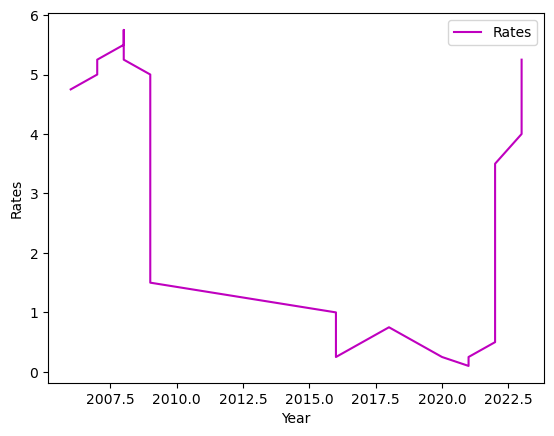

In [64]:

y = rates["Rates"]
x = rates["Year"]
# Only show the data from 2008 onwards
after_2006 = rates[rates["Year"] >= 2006]

y_after_2006 = after_2006["Rates"]
x_after_2006 = after_2006["Year"]

plt.plot(x_after_2006, y_after_2006, color = 'm')
plt.ylabel('Rates')
plt.xlabel('Year')
plt.legend(["Rates"], loc ="upper right")
plt.show()
